**THIS IS A WORK IN PROGRESS.**

After cleaning the data and clustering the data via K-Means clustering and PCA, I am not satisfied with the results here. I'm going to tweak this more after I'm done with the Coursera courses I'm currently in.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [33]:
aad=pd.read_csv(r'C:\Users\rober\Documents\Data Science\GitHub\DIY projects\Datasets\aa_dataset-tickets-multi-lang-5-2-50-version.csv')

In [34]:
aad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28587 entries, 0 to 28586
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   subject   24749 non-null  object
 1   body      28587 non-null  object
 2   answer    28580 non-null  object
 3   type      28587 non-null  object
 4   queue     28587 non-null  object
 5   priority  28587 non-null  object
 6   language  28587 non-null  object
 7   version   28587 non-null  int64 
 8   tag_1     28587 non-null  object
 9   tag_2     28574 non-null  object
 10  tag_3     28451 non-null  object
 11  tag_4     25529 non-null  object
 12  tag_5     14545 non-null  object
 13  tag_6     5874 non-null   object
 14  tag_7     2040 non-null   object
 15  tag_8     565 non-null    object
dtypes: int64(1), object(15)
memory usage: 3.5+ MB


In [35]:
aad.duplicated().sum()

np.int64(0)

In [36]:
aad_sub_body_answer=aad[['subject','body','answer']]

In [37]:
tags = aad[['tag_1','tag_2','tag_3','tag_4','tag_5','tag_6','tag_7','tag_8']]

In [38]:
for tag in tags.columns:
    print (tags[tag].value_counts())
    print('-' *30)
    

tag_1
Security          5880
Bug               5337
Feedback          3557
Feature           3081
Performance       3065
                  ... 
Recovery             1
Shipping             1
Employee             1
Infrastructure       1
Warranty             1
Name: count, Length: 116, dtype: int64
------------------------------
tag_2
Performance       5903
IT                2697
Documentation     1970
Disruption        1850
Sales             1516
                  ... 
Authentication       1
Adjustment           1
Data Loss            1
Delay                1
Technical            1
Name: count, Length: 256, dtype: int64
------------------------------
tag_3
IT                    6121
Tech Support          2635
Performance           2611
Disruption            1877
Documentation         1610
                      ... 
Query Optimization       1
Consultation             1
Data Leakage             1
Query                    1
Warranty                 1
Name: count, Length: 392, dtype: int64


In [39]:
aad['tag_1'].value_counts()

tag_1
Security          5880
Bug               5337
Feedback          3557
Feature           3081
Performance       3065
                  ... 
Recovery             1
Shipping             1
Employee             1
Infrastructure       1
Warranty             1
Name: count, Length: 116, dtype: int64

In [40]:
aad['tag_2'].value_counts()

tag_2
Performance       5903
IT                2697
Documentation     1970
Disruption        1850
Sales             1516
                  ... 
Authentication       1
Adjustment           1
Data Loss            1
Delay                1
Technical            1
Name: count, Length: 256, dtype: int64

In [41]:
aad['tag_3'].value_counts()

tag_3
IT                    6121
Tech Support          2635
Performance           2611
Disruption            1877
Documentation         1610
                      ... 
Query Optimization       1
Consultation             1
Data Leakage             1
Query                    1
Warranty                 1
Name: count, Length: 392, dtype: int64

In [42]:
aad['tag_4'].value_counts()

tag_4
Tech Support     6568
IT               4809
Documentation    1303
Performance      1244
Disruption       1242
                 ... 
Plan                1
System Patch        1
Accounting          1
Control             1
HR                  1
Name: count, Length: 554, dtype: int64

In [43]:
aad['tag_5'].value_counts()

tag_5
Tech Support           4617
IT                     1932
Recovery                668
Documentation           557
Feedback                481
                       ... 
Access                    1
Downtime                  1
Patient                   1
System\n\n                1
Issue Investigation       1
Name: count, Length: 602, dtype: int64

In [44]:
aad['tag_6'].value_counts()

tag_6
Tech Support             1847
IT                        435
Support                   132
Recovery                  129
Documentation             120
                         ... 
Financial Institution       1
Threat Prevention           1
Technology Support          1
Project                     1
Content Strategy            1
Name: count, Length: 575, dtype: int64

In [45]:
aad['tag_7'].value_counts()

tag_7
Tech Support       391
Support             80
IT                  77
Integration         32
Troubleshooting     26
                  ... 
Recommendation       1
Whitepaper           1
Urgent               1
Service Request      1
Good Practice        1
Name: count, Length: 427, dtype: int64

In [46]:
aad['tag_8'].value_counts()

tag_8
Tech Support           77
Support                36
IT                     15
Assistance             15
Guidance               13
                       ..
Business Growth         1
System Availability     1
Advertising             1
Opportunity             1
Training                1
Name: count, Length: 224, dtype: int64

In [47]:
aad['queue'].value_counts()

queue
Technical Support                  8362
Product Support                    5252
Customer Service                   4268
IT Support                         3433
Billing and Payments               2788
Returns and Exchanges              1437
Service Outages and Maintenance    1148
Sales and Pre-Sales                 918
Human Resources                     576
General Inquiry                     405
Name: count, dtype: int64

In [48]:
aad.head()

,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich möchte eine...",Vielen Dank für die Meldung des kritischen Sic...,Incident,Technical Support,high,de,51,Security,Outage,Disruption,Data Breach,NaN,NaN,NaN,NaN
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,en,51,Account,Disruption,Outage,IT,Tech Support,NaN,NaN,NaN
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,medium,en,51,Product,Feature,Tech Support,NaN,NaN,NaN,NaN,NaN
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,Request,Billing and Payments,low,en,51,Billing,Payment,Account,Documentation,Feedback,NaN,NaN,NaN
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,Problem,Sales and Pre-Sales,medium,en,51,Product,Feature,Feedback,Tech Support,NaN,NaN,NaN,NaN


In [49]:
aad.type.value_counts()

type
Incident    11466
Request      8187
Problem      6012
Change       2922
Name: count, dtype: int64

In [50]:
aad['type'] = aad['type'].replace({'Incident':1, 'Request':2, 'Problem':3, 'Change':4})

In [51]:
aad.queue.value_counts()

queue
Technical Support                  8362
Product Support                    5252
Customer Service                   4268
IT Support                         3433
Billing and Payments               2788
Returns and Exchanges              1437
Service Outages and Maintenance    1148
Sales and Pre-Sales                 918
Human Resources                     576
General Inquiry                     405
Name: count, dtype: int64

In [52]:
aad['queue'] = aad['queue'].replace({'Technical Support':1, 'Product Support': 2, 'Customer Service':3,
                                     'IT Support': 4, 'Billing and Payments': 5,
                                     'Returns and Exchanges': 6, 'Service Outages and Maintenance': 7,
                                     'Sales and Pre-Sales': 8, 'Human Resources': 9,
                                     'General Inquiry':10})

In [53]:
aad.priority.value_counts()

priority
medium    11515
high      11178
low        5894
Name: count, dtype: int64

In [54]:
aad['priority'] = aad['priority'].replace({'low':1, 'medium':2, 'high':3})

In [55]:
aad.language.value_counts()

language
en    16338
de    12249
Name: count, dtype: int64

In [56]:
aad['language'] = aad['language'].replace({'en':1,'de':2})

In [57]:
# Convert tag_1 to tag_8 to integer codes, nulls to 0
for col in ['tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6', 'tag_7', 'tag_8']:
    aad[col] = aad[col].astype('category').cat.codes + 1  # Start codes at 1
    aad[col] = aad[col].replace(-1, 0).astype(int)  # Replace missing with 0

In [58]:
aad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28587 entries, 0 to 28586
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   subject   24749 non-null  object
 1   body      28587 non-null  object
 2   answer    28580 non-null  object
 3   type      28587 non-null  int64 
 4   queue     28587 non-null  int64 
 5   priority  28587 non-null  int64 
 6   language  28587 non-null  int64 
 7   version   28587 non-null  int64 
 8   tag_1     28587 non-null  int64 
 9   tag_2     28587 non-null  int64 
 10  tag_3     28587 non-null  int64 
 11  tag_4     28587 non-null  int64 
 12  tag_5     28587 non-null  int64 
 13  tag_6     28587 non-null  int64 
 14  tag_7     28587 non-null  int64 
 15  tag_8     28587 non-null  int64 
dtypes: int64(13), object(3)
memory usage: 3.5+ MB


In [59]:
aad.head()

,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich möchte eine...",Vielen Dank für die Meldung des kritischen Sic...,1,1,3,2,51,89,168,146,134,0,0,0,0
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",1,1,3,1,51,5,107,250,245,546,0,0,0
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,2,6,2,1,51,81,120,359,0,0,0,0,0
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,2,5,1,1,51,13,171,8,186,224,0,0,0
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,3,8,2,1,51,81,120,164,505,0,0,0,0


In [60]:
# Add Ticket # column with zero-padded sequential numbers
ticket_numbers = [f"{i:04d}" for i in range(1, len(aad) + 1)]

# Insert as the first column
aad.insert(0, 'Ticket #', ticket_numbers)

In [61]:
aad.head()

,Ticket #,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,0001,Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich möchte eine...",Vielen Dank für die Meldung des kritischen Sic...,1,1,3,2,51,89,168,146,134,0,0,0,0
1,0002,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",1,1,3,1,51,5,107,250,245,546,0,0,0
2,0003,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,2,6,2,1,51,81,120,359,0,0,0,0,0
3,0004,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,2,5,1,1,51,13,171,8,186,224,0,0,0
4,0005,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,3,8,2,1,51,81,120,164,505,0,0,0,0


In [62]:
aad.drop(['subject', 'body', 'answer'], axis=1, inplace=True)

In [63]:
print(aad['type'].value_counts(normalize=True))

type
1    0.401091
2    0.286389
3    0.210305
4    0.102214
Name: proportion, dtype: float64


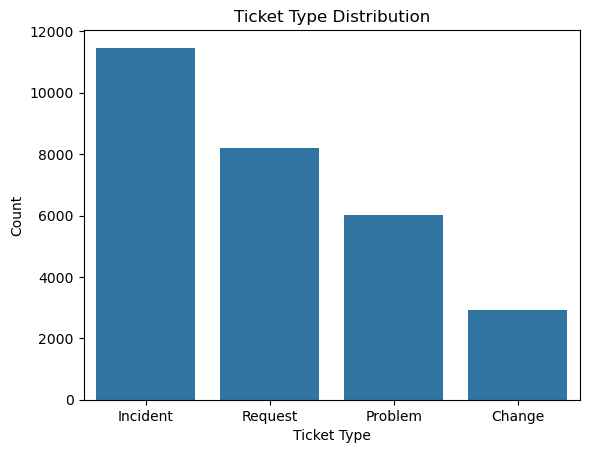

In [64]:
sns.countplot(data = aad, x='type')
plt.xticks([0,1,2,3], ['Incident', 'Request', 'Problem', 'Change'])
plt.title('Ticket Type Distribution')
plt.ylabel('Count')
plt.xlabel('Ticket Type')
plt.show()

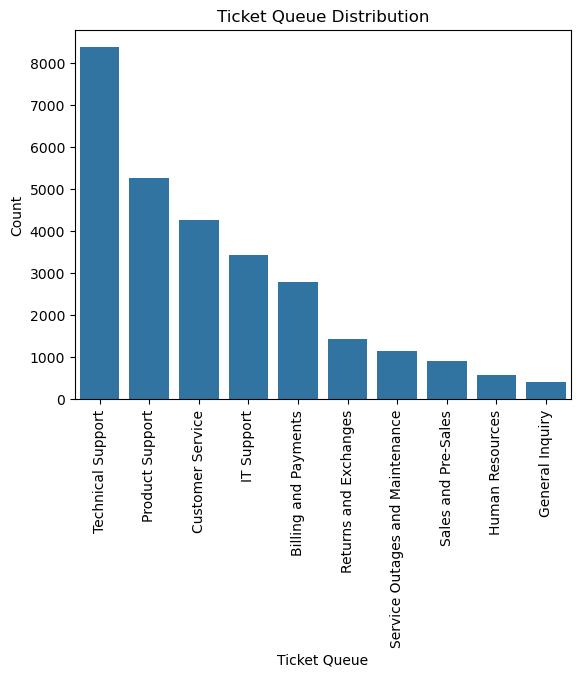

In [65]:
sns.countplot(data=aad, x='queue')
plt.xticks ([0,1,2,3,4,5,6,7,8,9], ['Technical Support', 'Product Support', 'Customer Service',
                                     'IT Support', 'Billing and Payments',
                                     'Returns and Exchanges', 'Service Outages and Maintenance',
                                     'Sales and Pre-Sales', 'Human Resources',
                                     'General Inquiry'])
plt.xticks(rotation=90)
plt.title ('Ticket Queue Distribution')
plt.ylabel('Count')
plt.xlabel('Ticket Queue')
plt.show()

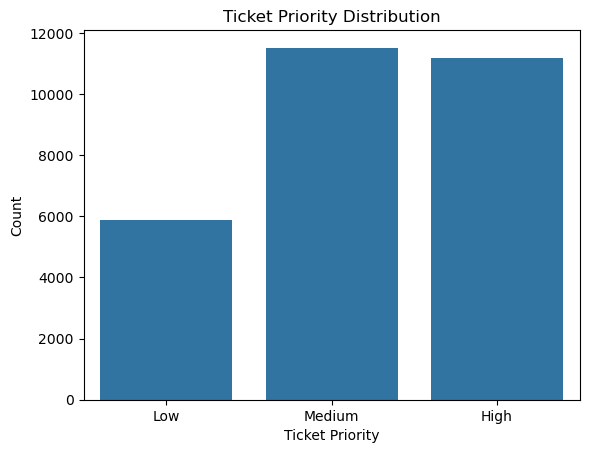

In [66]:
sns.countplot(data = aad, x='priority')
plt.xticks([0,1,2], ['Low', 'Medium', 'High'])
plt.xlabel('Ticket Priority')
plt.ylabel('Count')
plt.title('Ticket Priority Distribution')
plt.show()

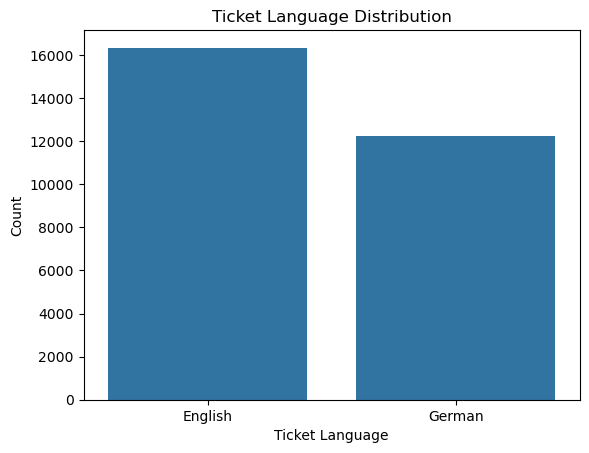

In [67]:
sns.countplot (data=aad, x='language')
plt.xticks([0,1], ['English', 'German'])
plt.title('Ticket Language Distribution')
plt.ylabel('Count')
plt.xlabel('Ticket Language')
plt.show()

In [68]:
aad['version'].value_counts()

version
400    18599
52      9119
51       869
Name: count, dtype: int64

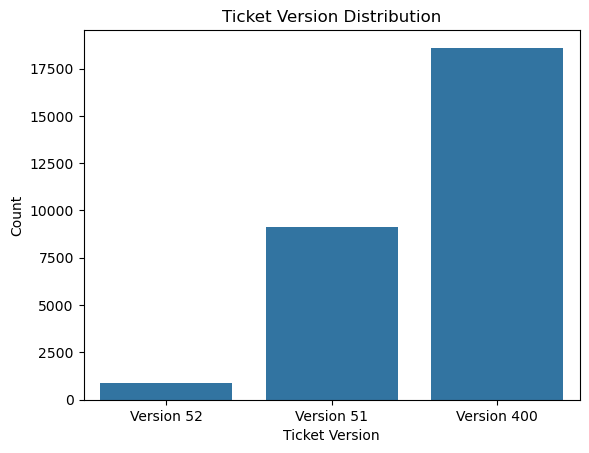

In [69]:
sns.countplot (data=aad, x='version')
plt.xticks([0,1,2], ['Version 52', 'Version 51', 'Version 400'])
plt.title('Ticket Version Distribution')
plt.ylabel('Count')
plt.xlabel('Ticket Version')
plt.show()

In [70]:
num_cols = aad.select_dtypes(include=[np.number]).columns.tolist()

In [71]:
num_cols_corr = aad[num_cols].corr()

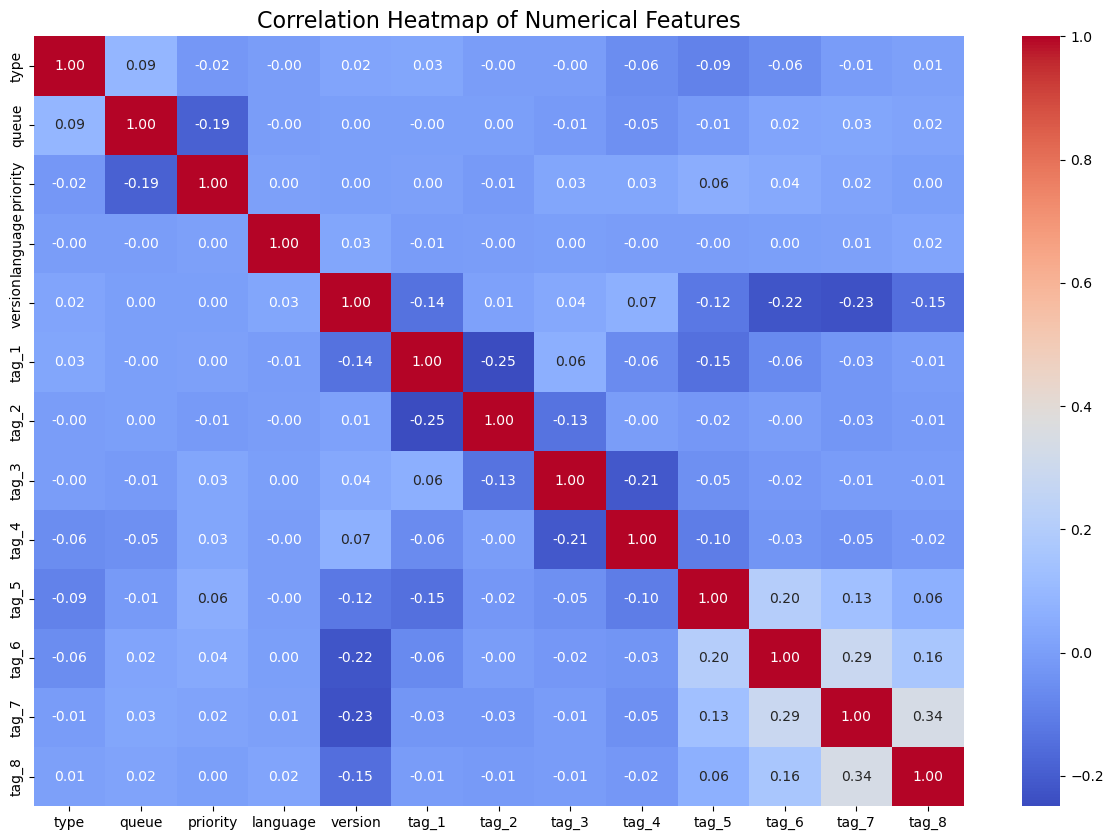

In [75]:
plt.figure(figsize=(15,10))
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
sns.heatmap(num_cols_corr, annot=True, cmap='coolwarm', fmt='.2f');

**OBSERVATIONS ON HEATMAP**

Not much to say here. Does not seem to be any correlation between any two combinations of categories.

**TO BE CONTINUED. Working on Cousera courses and will come back to this.**

In [76]:
aad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28587 entries, 0 to 28586
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Ticket #  28587 non-null  object
 1   type      28587 non-null  int64 
 2   queue     28587 non-null  int64 
 3   priority  28587 non-null  int64 
 4   language  28587 non-null  int64 
 5   version   28587 non-null  int64 
 6   tag_1     28587 non-null  int64 
 7   tag_2     28587 non-null  int64 
 8   tag_3     28587 non-null  int64 
 9   tag_4     28587 non-null  int64 
 10  tag_5     28587 non-null  int64 
 11  tag_6     28587 non-null  int64 
 12  tag_7     28587 non-null  int64 
 13  tag_8     28587 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 3.1+ MB


In [80]:
#standardizing data
aad.drop(['Ticket #'], axis=1, inplace=True)
scaler = StandardScaler()
aad_scaled =pd.DataFrame(scaler.fit_transform(aad), columns= aad.columns)
aad_scaled.head()

,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,cluster
0,-1.003622,-0.988846,1.086370,1.154913,-1.370101,1.370778,0.497188,-0.849761,-0.947518,-0.865229,-0.447147,-0.243539,-0.125418,-0.990144
1,-1.003622,-0.988846,1.086370,-0.865866,-1.370101,-1.669488,-0.735359,0.410297,-0.283618,1.606484,-0.447147,-0.243539,-0.125418,-0.990144
2,-0.013508,1.219913,-0.246337,-0.865866,-1.370101,1.081228,-0.472685,1.730936,-1.748983,-0.865229,-0.447147,-0.243539,-0.125418,-0.990144
3,-0.013508,0.778161,-1.579043,-0.865866,-1.370101,-1.379939,0.557805,-2.521762,-0.636502,0.148807,-0.447147,-0.243539,-0.125418,0.380769
4,0.976607,2.103416,-0.246337,-0.865866,-1.370101,1.081228,-0.472685,-0.631674,1.271463,-0.865229,-0.447147,-0.243539,-0.125418,0.380769


In [81]:
#KMeans algorithm for elbow method
WCSS={}
for k in range(2,10):
  kmeans = KMeans (n_clusters=k, max_iter=1000).fit(aad_scaled)
  WCSS[k]=kmeans.inertia_

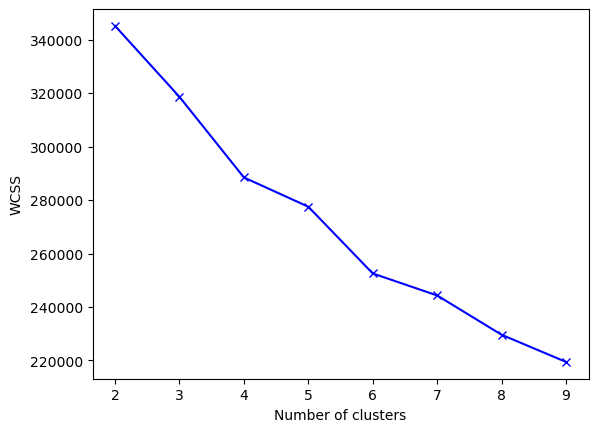

In [82]:
#Plotting the Elbow point
plt.figure()
plt.plot(list(WCSS.keys()), list(WCSS.values()), 'bx-')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [83]:
silhouette_scores = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(aad_scaled)
    score = silhouette_score(aad_scaled, kmeans.labels_)
    silhouette_scores.append(score)

optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print("Optimal k based on silhouette score:", optimal_k)

Optimal k based on silhouette score: 8


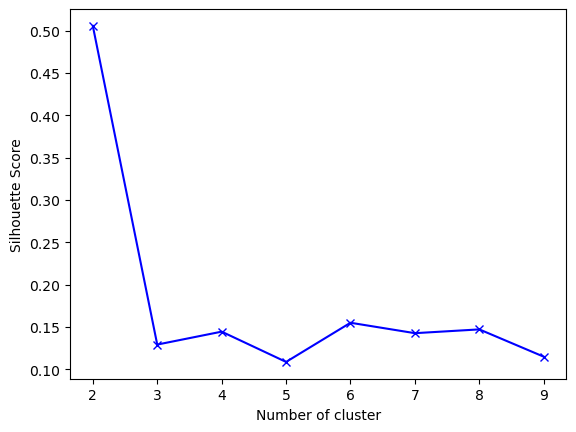

In [84]:
sc = {}

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(aad_scaled)
    labels = kmeans.predict(aad_scaled)
    sc[k] = silhouette_score(aad_scaled, labels)

#Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

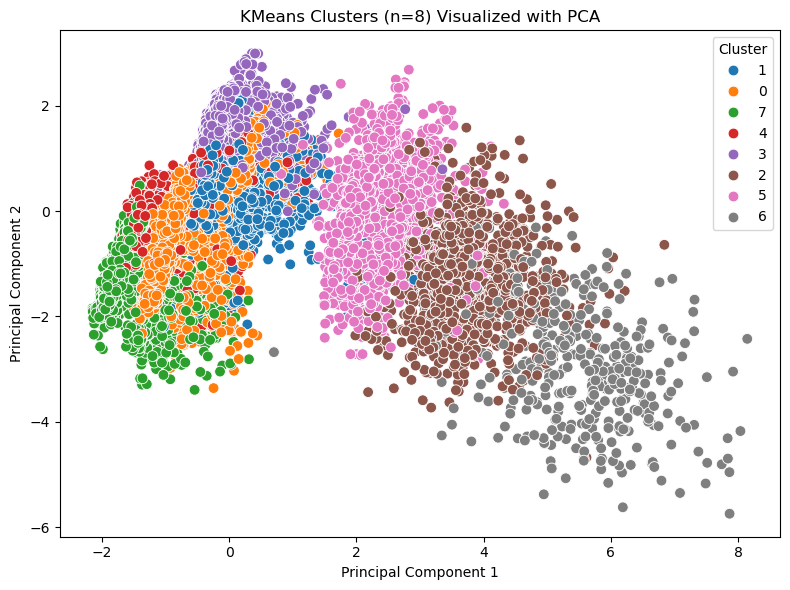

In [89]:
#plotting 8 clusters
from sklearn.decomposition import PCA
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(aad_scaled)
cluster_labels = kmeans.labels_

pca = PCA(n_components=8)
aad_pca = pca.fit_transform(aad_scaled)

plot_df = pd.DataFrame(aad_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7','PC8'])
plot_df['Cluster'] = cluster_labels.astype(str)  # Strings for categorical coloring

#Plot with Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=60)
plt.title('KMeans Clusters (n=8) Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

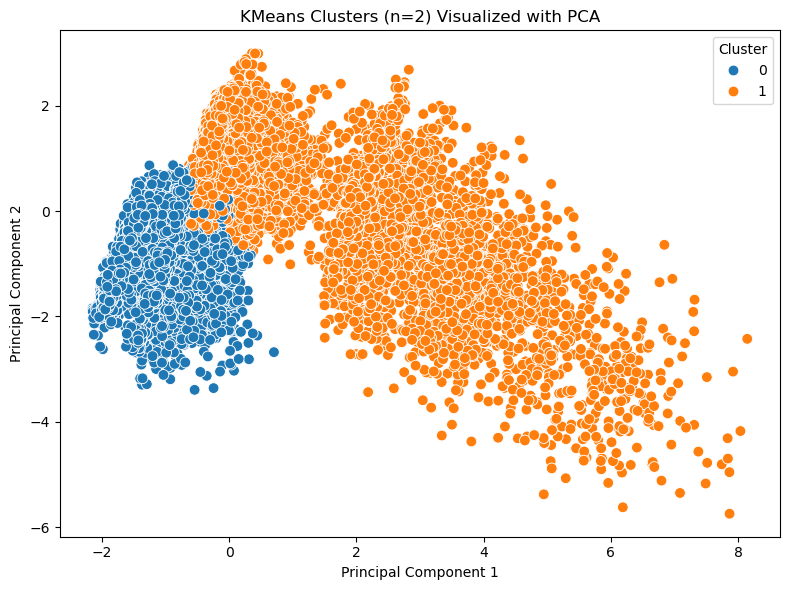

In [91]:
#plotting 2 clusters
from sklearn.decomposition import PCA
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(aad_scaled)
cluster_labels = kmeans.labels_

pca = PCA(n_components=2)
aad_pca = pca.fit_transform(aad_scaled)

plot_df = pd.DataFrame(aad_pca, columns=['PC1', 'PC2'])
plot_df['Cluster'] = cluster_labels.astype(str)  # Strings for categorical coloring

#Plot with Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=60)
plt.title('KMeans Clusters (n=2) Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [92]:
#Fitting the K-means algorithms on the scaled data with number of cluster equal to 2 
# and Storing the predictions as 'Labels' to the 'aad_scaled' and 'aad' dataframes
kmeans = KMeans(n_clusters=2, max_iter= 1000, random_state=1)
kmeans.fit(aad_scaled)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,1000
,tol,0.0001
,verbose,0
,random_state,1
,copy_x,True
,algorithm,'lloyd'


In [93]:
#Adding predicted labels to the original data and scaled data
aad['Labels'] = kmeans.predict(aad_scaled)
aad_scaled['Labels'] = kmeans.predict(aad_scaled)

In [94]:
aad.Labels.value_counts()

Labels
0    23840
1     4747
Name: count, dtype: int64

In [95]:
#Calculating summary statistics of the original data for each label
mean = aad.groupby('Labels').mean()
median = aad.groupby('Labels').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_0 Median', 'group_1 Median']
df_kmeans.T

,group_0 Mean,group_1 Mean,group_0 Median,group_1 Median
type,2.039849,1.882031,2.0,2.0
queue,3.210822,3.377291,3.0,3.0
priority,2.170344,2.257636,2.0,2.0
language,1.427265,1.434590,1.0,1.0
version,299.043666,174.616811,400.0,52.0
tag_1,51.832676,47.580367,42.0,47.0
tag_2,143.797735,141.364230,162.0,162.0
tag_3,217.323658,210.170002,194.0,240.0
tag_4,295.520218,276.845587,245.0,287.0
tag_5,169.854656,297.969033,0.0,259.0


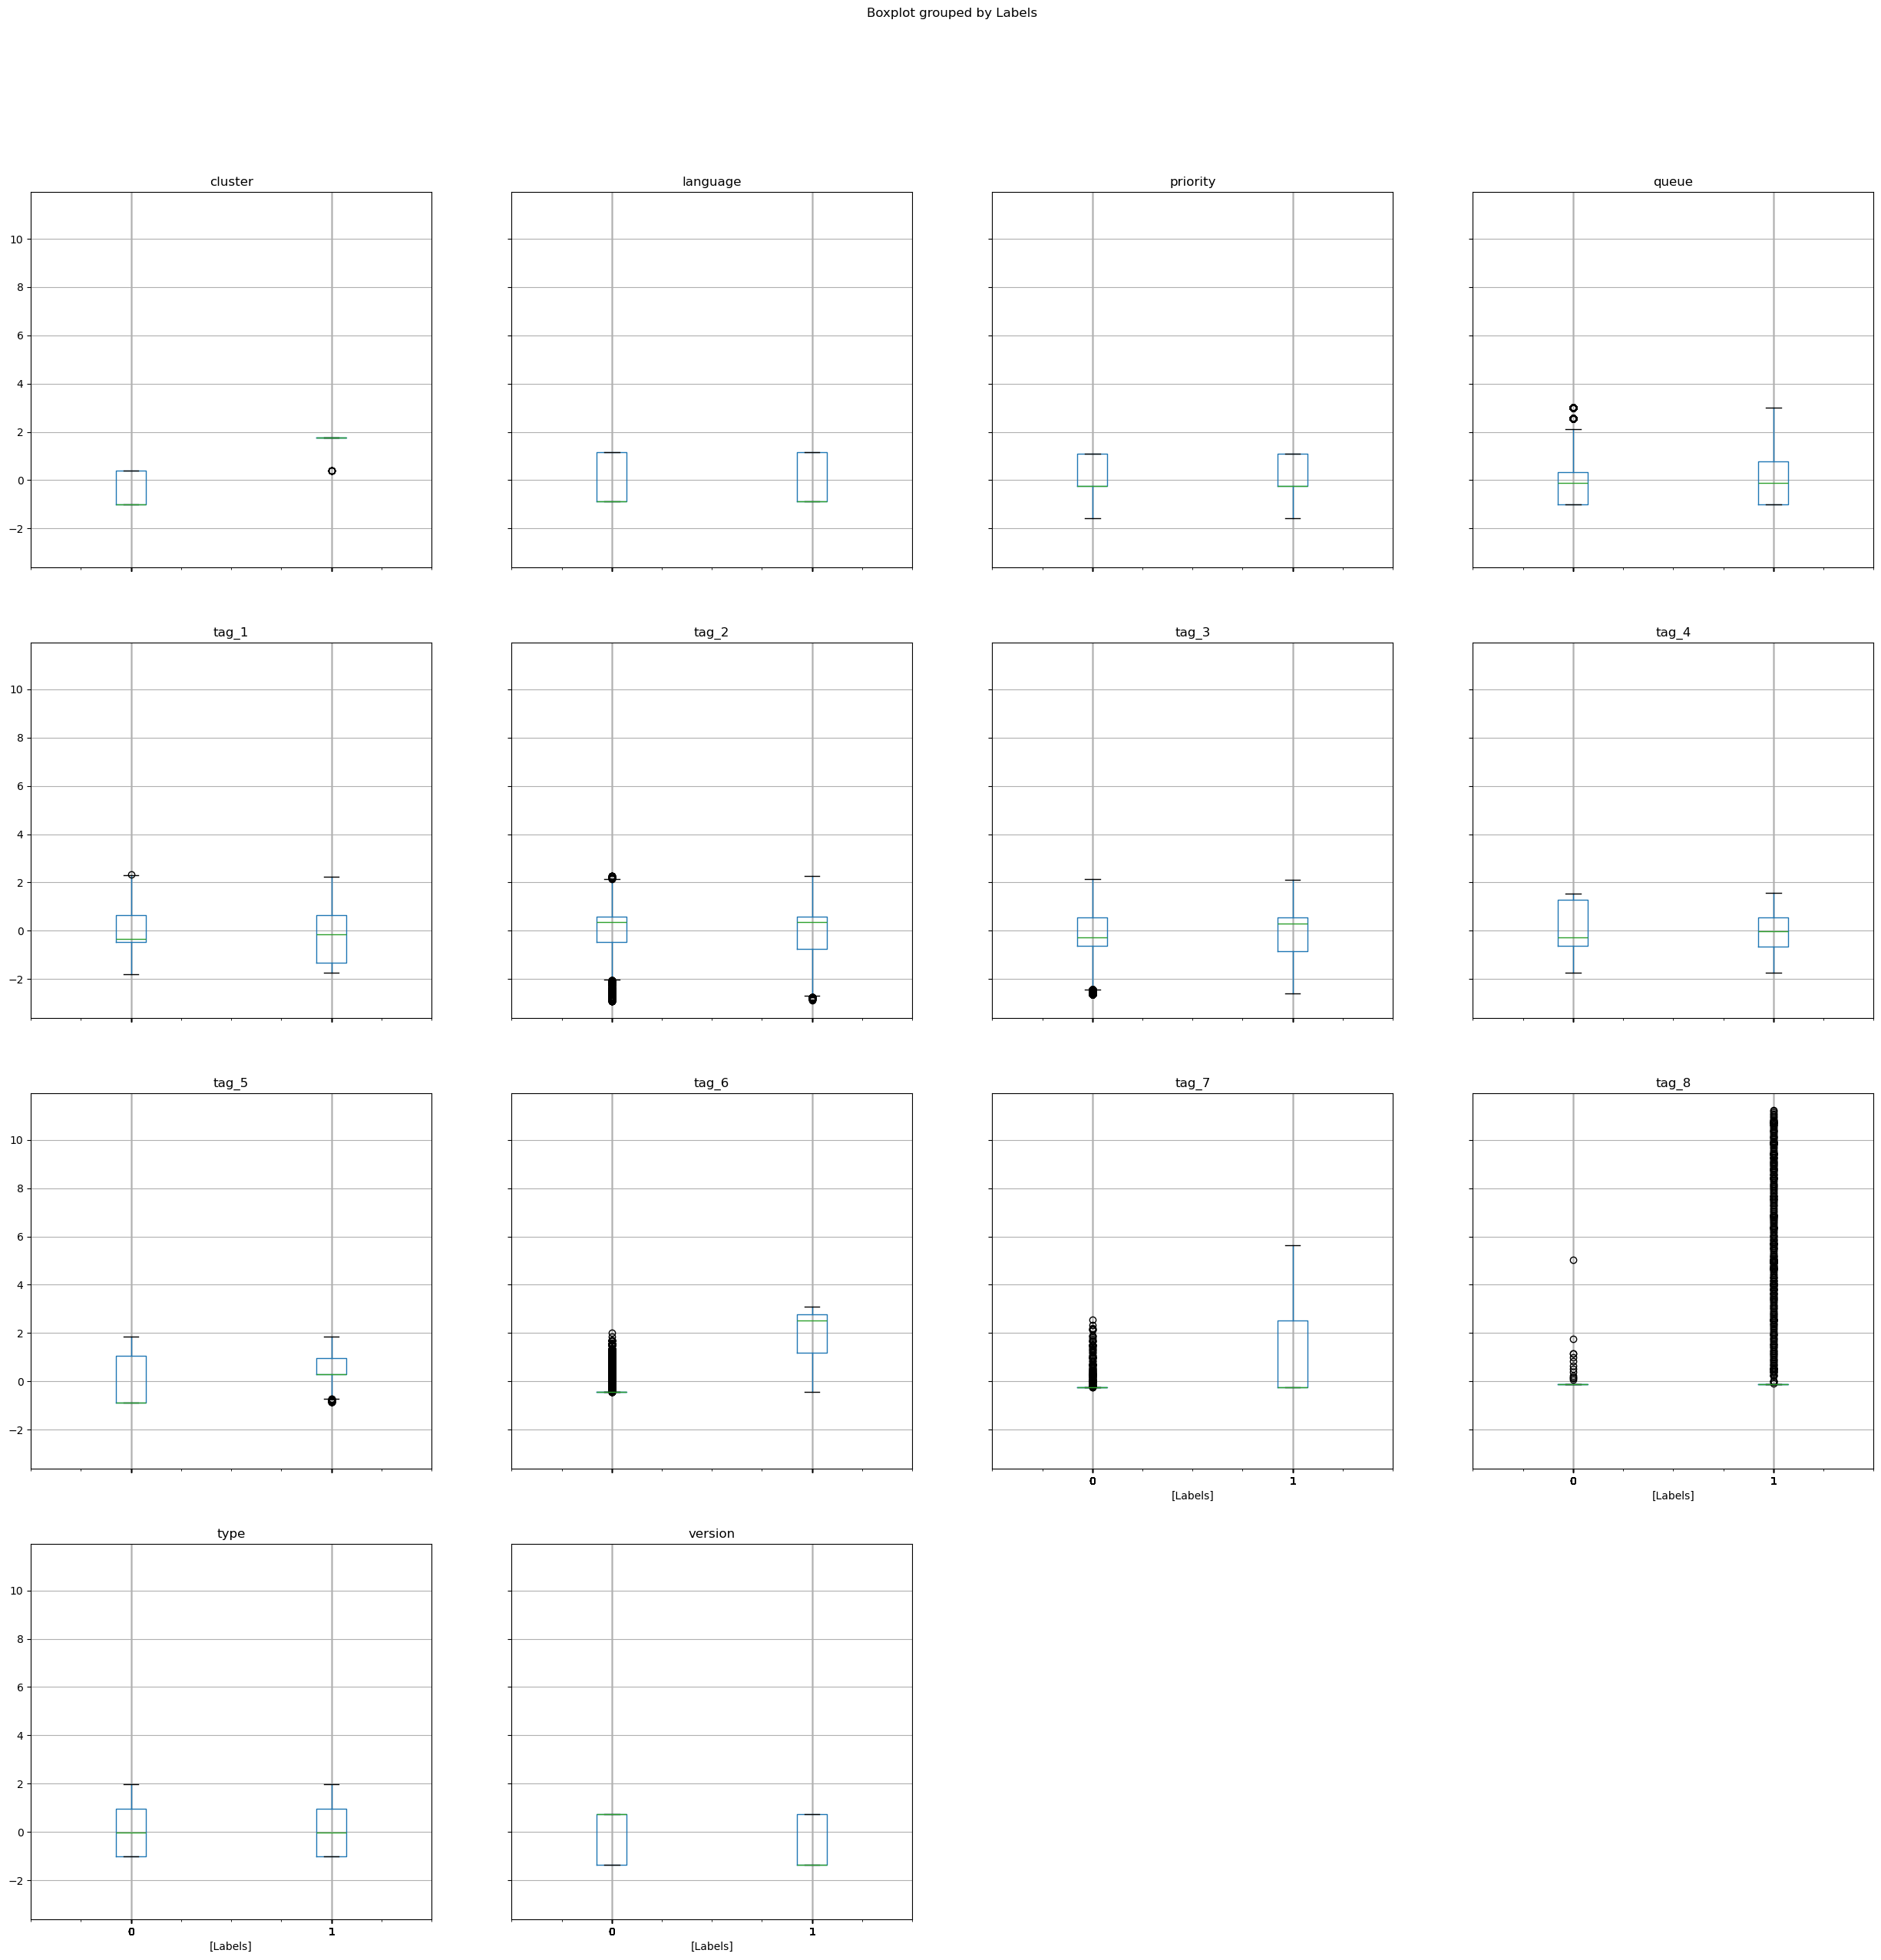

In [96]:
#Visualizing different features w.r.t K-means labels
aad_scaled.boxplot(by = 'Labels', figsize=(30,30))
plt.show()

**TO BE CONTINUED.**

I am not satisfied with the results here. I'm going to tweak this more after I'm done with the Coursera courses I'm currently in.